In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline

In [2]:
# Data Files
file_path = "group3_resources\SpotifyFeatures.csv"

#Load Data
orignal_df = pd.read_csv(file_path)
orignal_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
orignal_df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [4]:
len(orignal_df)

232725

In [5]:
orignal_df['artist_name'].nunique()

14564

In [6]:
orignal_df['track_name'].nunique()

148615

In [7]:
orignal_df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [8]:
orignal_df['genre'].nunique()

27

In [9]:
group_df = orignal_df.groupby(["genre",]).count()
group_df = group_df.sort_values(["track_name"], ascending=False)
group_df

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,,,,,,,,,,,,,,,,,
Comedy,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681
Soundtrack,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646
Indie,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543
Jazz,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441
Pop,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386
Electronic,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377
Children’s Music,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353
Folk,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299
Hip-Hop,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295


In [10]:
group_df['artist_name'].sum()

232725

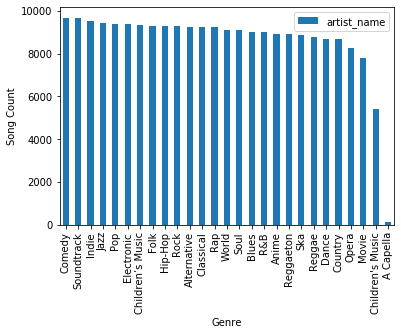

<Figure size 432x288 with 0 Axes>

In [11]:
drop_these = ['track_name', 'loudness','track_id', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
genre_song_count = group_df.drop(columns = drop_these)
genre_song_chart = genre_song_count.plot(kind='bar')

genre_song_chart.set_xlabel('Genre')
genre_song_chart.set_ylabel("Song Count")

plt.show()
plt.tight_layout()

In [12]:
#Are there dupicates by artist, genre and track name
group_df = orignal_df.groupby(["artist_name", "genre", "track_name"]).count()
group_df = group_df.sort_values(["track_id"], ascending=False)
group_df

track_id  \
artist_name                       genre       track_name                                                     
!!!                               Alternative Even When The Water's Cold                                 1   
Orion Sun                         Alternative Antidote                                                   1   
Orchestral Manoeuvres In The Dark Dance       If You Leave                                               1   
                                              So In Love                                                 1   
                                  Rock        Enola Gay - Remastered                                     1   
...                                                                                                    ...   
Giuseppe Verdi                    Opera       Verdi: Messa da Requiem: VI. Communion - Lux ae...         1   
                                              Verdi: Messa da Requiem: VII. Libera me, 1. Lib...         1   
                                              Verdi: Messa da Requiem: VII. Libera me, 2. Req...         1   
                                              Verdi: Messa da Requiem: VII. Libera me, 3. Lib...         1   
정진우                               R&B         I'll Find You (feat. June)                                 1   

                                                                                                  popularity  \
artist_name                       genre       track_name                                                       
!!!                               Alternative Even When The Water's Cold                                   1   
Orion Sun                         Alternative Antidote                                                     1   
Orchestral Manoeuvres In The Dark Dance       If You Leave                                                 1   
                                              So In Love                                                   1   
                                  Rock        Enola Gay - Remastered                                       1   
...                                                                                                      ...   
Giuseppe Verdi                    Opera       Verdi: Messa da Requiem: VI. Communion - Lux ae...           1   
                                              Verdi: Messa da Requiem: VII. Libera me, 1. Lib...           1   
                                              Verdi: Messa da Requiem: VII. Libera me, 2. Req...           1   
                                              Verdi: Messa da Requiem: VII. Libera me, 3. Lib...           1   
정진우                               R&B         I'll Find You (feat. June)                                   1   

                                                                                                  acousticness  \
artist_name                       genre       track_name                                                         
!!!                               Alternative Even When The Water's Cold                                     1   
Orion Sun                         Alternative Antidote                                                       1   
Orchestral Manoeuvres In The Dark Dance       If You Leave                                                   1   
                                              So In Love                                                     1   
                                  Rock        Enola Gay - Remastered                                         1   
...                                                                                                        ...   
Giuseppe Verdi                    Opera       Verdi: Messa da Requiem: VI. Communion - Lux ae...             1   
                                              Verdi: Messa da Requiem: VII. Libera me, 1. Lib...             1   
                                              Verdi: Messa da Requiem:

In [13]:
#Before I get rid of duplicates, if a track has duplicated genres does that contribute to it's popularity?
group_df = orignal_df.groupby(["popularity", "artist_name", "track_name"]).count()
group_df2 = group_df.sort_values(["popularity", "genre"], ascending=False)
group_df2

genre  \
popularity artist_name   track_name                                        
100        Ariana Grande 7 rings                                       2   
99         Ariana Grande break up with your girlfriend, i'm bored      2   
           Post Malone   Wow.                                          2   
98         Daddy Yankee  Con Calma                                     3   
97         Halsey        Without Me                                    3   
...                                                                  ...   
0          graves        Exhale                                        1   
                         Glass Hearts (How Much You Mean)              1   
                         Intro                                         1   
           大原ゆい子         チャンス -Instrumental-                           1   
                         ラブビーム中 -Instrumental-                         1   

                                                                   track_id  \
popularity artist_name   track_name                                           
100        Ariana Grande 7 rings                                          2   
99         Ariana Grande break up with your girlfriend, i'm bored         2   
           Post Malone   Wow.                                             2   
98         Daddy Yankee  Con Calma                                        3   
97         Halsey        Without Me                                       3   
...                                                                     ...   
0          graves        Exhale                                           1   
                         Glass Hearts (How Much You Mean)                 1   
                         Intro                                            1   
           大原ゆい子         チャンス -Instrumental-                              1   
                         ラブビーム中 -Instrumental-                            1   

                                                                   acousticness  \
popularity artist_name   track_name                                               
100        Ariana Grande 7 rings                                              2   
99         Ariana Grande break up with your girlfriend, i'm bored             2   
           Post Malone   Wow.                                                 2   
98         Daddy Yankee  Con Calma                                            3   
97         Halsey        Without Me                                           3   
...                                                                         ...   
0          graves        Exhale                                               1   
                         Glass Hearts (How Much You Mean)                     1   
                         Intro                                                1   
           大原ゆい子         チャンス -Instrumental-                                  1   
                         ラブビーム中 -Instrumental-                                1   

                                                                   danceability  \
popularity artist_name   track_name                                               
100        Ariana Grande 7 rings                                              2   
99         Ariana Grande break up with your girlfriend, i'm bored             2   
           Post Malone   Wow.                                                 2   
98         Daddy Yankee  Con Calma                                            3   
97         Halsey        Without Me                                           3   
...                                                                         ...   
0          graves        Exhale                                               1   
                         Glass Hearts (How Much You Mean)                     1   
                         Intro                                                1   
           大原ゆい子         チャンス -Instrumental-             

In [14]:
group_df2.to_csv(r'group3_resources\carol_test.csv', index = True, header = True)

In [15]:
# Data Files
file_path = "group3_resources\carol_test.csv"

#Load Data
genre_counts_df = pd.read_csv(file_path)
genre_counts_df.head()

,popularity,artist_name,track_name,genre,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,100,Ariana Grande,7 rings,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,99,Ariana Grande,"break up with your girlfriend, i'm bored",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,99,Post Malone,Wow.,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,98,Daddy Yankee,Con Calma,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,97,Halsey,Without Me,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


The correlation between Number of Genre and popularity is 0.42


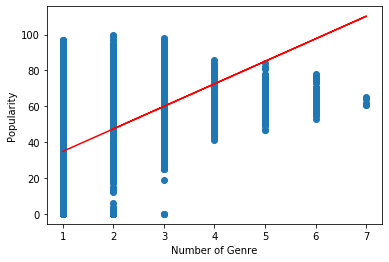

In [16]:
# I did scatter plot to help see if there's any correlation between the number 
#of genre's a song is in vs popularity. 
x=genre_counts_df['genre']
y=genre_counts_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=genre_counts_df['genre'], y=genre_counts_df['popularity'])
plt.plot(x,regress_values,"r-")
plt.show
plt.ylabel("Popularity")
plt.xlabel("Number of Genre");

correlation = st.pearsonr(x,y)
print(f"The correlation between Number of Genre and popularity is {round(correlation[0],2)}")

In [17]:
dfgroup = orignal_df.groupby(["popularity", "genre"]).count()
dfgroup


artist_name  track_name  track_id  acousticness  \
popularity genre                                                               
0          A Capella                  10          10        10            10   
           Alternative                 7           7         7             7   
           Anime                      36          36        36            36   
           Blues                      55          55        55            55   
           Children's Music         2966        2966      2966          2966   
...                                  ...         ...       ...           ...   
99         Dance                       1           1         1             1   
           Pop                         2           2         2             2   
           Rap                         1           1         1             1   
100        Dance                       1           1         1             1   
           Pop                         1           1         1             1   

                             danceability  duration_ms  energy  \
popularity genre                                                 
0          A Capella                   10           10      10   
           Alternative                  7            7       7   
           Anime                       36           36      36   
           Blues                       55           55      55   
           Children's Music          2966         2966    2966   
...                                   ...          ...     ...   
99         Dance                        1            1       1   
           Pop                          2            2       2   
           Rap                          1            1       1   
100        Dance                        1            1       1   
           Pop                          1            1       1   

                             instrumentalness   key  liveness  loudness  mode  \
popularity genre                                                                
0          A Capella                       10    10        10        10    10   
           Alternative                      7     7         7         7     7   
           Anime                           36    36        36        36    36   
           Blues                           55    55        55        55    55   
           Children's Music              2966  2966      2966      2966  2966   
...                                       ...   ...       ...       ...   ...   
99         Dance                            1     1         1         1     1   
           Pop                              2     2         2         2     2   
           Rap                              1     1         1         1     1   
100        Dance                            1     1         1         1     1   
           Pop                              1     1         1         1     1   

                             speechiness  tempo  time_signature  valence  
popularity genre                                                          
0          A Capella                  10     10              10       10  
           Alternative                 7      7               7        7  
           Anime                      36     36              36       36  
           Blues                      55     55              55       55  
           Children's Music         2966   2966            2966     2966  
...                                  ...    ...             ...      ...  
99         Dance                       1      1               1        1  
           Pop                         2      2               2        2  
           Rap                         1      1               1        1  
100        Dance                       1      1               1        1  
           Pop                         1      1               1        1  

[1832 rows x 16 columns]

In [18]:
dfgroup.to_csv(r'group3_resources\carol_test2.csv', index = True, header = True)

In [19]:
orignal_df.corr()
#missing popularity
#groupby genre and then run coorolations

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


In [30]:
df2 = orignal_df.loc[orignal_df["genre"] == "Folk"]
df2.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.029047,0.046409,-0.005297,0.056787,-0.058579,-0.055488,0.046695,-0.014179,-0.009207,0.032965
acousticness,-0.029047,1.000000,-0.090287,-0.083569,-0.750295,0.070784,-0.105789,-0.599980,-0.035936,-0.094543,-0.327986
danceability,0.046409,-0.090287,1.000000,-0.140158,0.126751,-0.109342,-0.068600,0.076820,0.073094,-0.126074,0.449352
duration_ms,-0.005297,-0.083569,-0.140158,1.000000,0.039352,0.142308,0.042635,0.012005,-0.076287,0.001643,-0.182831
energy,0.056787,-0.750295,0.126751,0.039352,1.000000,-0.012968,0.164365,0.777821,0.140805,0.138113,0.469361
instrumentalness,-0.058579,0.070784,-0.109342,0.142308,-0.012968,1.000000,-0.024854,-0.149020,-0.039163,-0.008417,-0.129070
liveness,-0.055488,-0.105789,-0.068600,0.042635,0.164365,-0.024854,1.000000,0.093186,0.106492,0.012668,0.096078
loudness,0.046695,-0.599980,0.076820,0.012005,0.777821,-0.149020,0.093186,1.000000,0.044304,0.085489,0.252764
speechiness,-0.014179,-0.035936,0.073094,-0.076287,0.140805,-0.039163,0.106492,0.044304,1.000000,0.080121,0.103379
tempo,-0.009207,-0.094543,-0.126074,0.001643,0.138113,-0.008417,0.012668,0.085489,0.080121,1.000000,0.099475


In [29]:
df2 = orignal_df.loc[orignal_df["genre"] == "Hip-Hop"]
df2.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,0.013038,0.091620,0.012769,-0.032563,-0.041420,-0.063401,0.086961,-0.083544,0.014690,0.029351
acousticness,0.013038,1.000000,-0.150690,0.030898,-0.220059,-0.000943,-0.028460,-0.206787,0.086735,-0.082001,0.048059
danceability,0.091620,-0.150690,1.000000,-0.149038,-0.155492,-0.035162,-0.183248,0.007581,-0.078414,-0.022568,0.166175
duration_ms,0.012769,0.030898,-0.149038,1.000000,0.088546,-0.041367,0.048203,0.030833,0.012863,-0.085640,0.015654
energy,-0.032563,-0.220059,-0.155492,0.088546,1.000000,-0.055281,0.188547,0.664657,-0.010065,0.009531,0.320501
instrumentalness,-0.041420,-0.000943,-0.035162,-0.041367,-0.055281,1.000000,-0.027548,-0.096950,-0.107249,0.004782,-0.018577
liveness,-0.063401,-0.028460,-0.183248,0.048203,0.188547,-0.027548,1.000000,0.070997,0.120308,-0.028035,0.055793
loudness,0.086961,-0.206787,0.007581,0.030833,0.664657,-0.096950,0.070997,1.000000,-0.122692,0.033580,0.161229
speechiness,-0.083544,0.086735,-0.078414,0.012863,-0.010065,-0.107249,0.120308,-0.122692,1.000000,0.052519,0.075404
tempo,0.014690,-0.082001,-0.022568,-0.085640,0.009531,0.004782,-0.028035,0.033580,0.052519,1.000000,-0.040909


In [31]:
df2 = orignal_df.loc[orignal_df["genre"] == "Indie"]
df2.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,0.057699,0.097425,-0.024698,-0.072737,-0.076112,-0.039362,-0.005017,0.035509,-0.053499,-0.011516
acousticness,0.057699,1.000000,-0.089351,0.003190,-0.743078,0.070694,-0.128993,-0.636469,-0.068997,-0.109804,-0.330084
danceability,0.097425,-0.089351,1.000000,-0.183588,0.035073,-0.107738,-0.049117,0.076875,0.160331,-0.195339,0.352827
duration_ms,-0.024698,0.003190,-0.183588,1.000000,-0.020505,0.113142,-0.039619,-0.052522,-0.121596,0.013629,-0.188787
energy,-0.072737,-0.743078,0.035073,-0.020505,1.000000,-0.016405,0.172293,0.787669,0.100783,0.159314,0.448819
instrumentalness,-0.076112,0.070694,-0.107738,0.113142,-0.016405,1.000000,0.003558,-0.187697,-0.115110,0.026040,-0.070814
liveness,-0.039362,-0.128993,-0.049117,-0.039619,0.172293,0.003558,1.000000,0.122853,0.063653,0.019982,0.089638
loudness,-0.005017,-0.636469,0.076875,-0.052522,0.787669,-0.187697,0.122853,1.000000,0.068463,0.098546,0.343651
speechiness,0.035509,-0.068997,0.160331,-0.121596,0.100783,-0.115110,0.063653,0.068463,1.000000,0.021187,0.081203
tempo,-0.053499,-0.109804,-0.195339,0.013629,0.159314,0.026040,0.019982,0.098546,0.021187,1.000000,0.052361


In [32]:
df2 = orignal_df.loc[orignal_df["genre"] == "Soul"]
df2.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.013006,0.060536,-0.026750,0.012687,-0.000945,-0.068243,0.050903,-0.006146,-0.018404,-0.026078
acousticness,-0.013006,1.000000,-0.273394,-0.064129,-0.581787,0.084404,-0.020506,-0.472262,-0.062045,-0.060333,-0.155013
danceability,0.060536,-0.273394,1.000000,-0.062683,0.173208,-0.022551,-0.105877,0.144156,0.098096,-0.108985,0.353819
duration_ms,-0.026750,-0.064129,-0.062683,1.000000,-0.002783,0.099467,0.024499,-0.092158,-0.077650,-0.025047,-0.053501
energy,0.012687,-0.581787,0.173208,-0.002783,1.000000,-0.046331,0.106849,0.707874,0.096211,0.084012,0.372645
instrumentalness,-0.000945,0.084404,-0.022551,0.099467,-0.046331,1.000000,-0.034591,-0.201673,-0.087605,-0.001694,-0.132342
liveness,-0.068243,-0.020506,-0.105877,0.024499,0.106849,-0.034591,1.000000,0.036769,0.059386,0.002333,0.056494
loudness,0.050903,-0.472262,0.144156,-0.092158,0.707874,-0.201673,0.036769,1.000000,0.054917,0.068170,0.151772
speechiness,-0.006146,-0.062045,0.098096,-0.077650,0.096211,-0.087605,0.059386,0.054917,1.000000,0.057650,0.059547
tempo,-0.018404,-0.060333,-0.108985,-0.025047,0.084012,-0.001694,0.002333,0.068170,0.057650,1.000000,0.027628


In [33]:
#do corrolations on the 90+ popular songs only. 
nintyplus = orignal_df